In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.imdb.load_data(num_words=300)

In [3]:
train_input.shape

(25000,)

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target =\
train_test_split(train_input, train_target, test_size=0.2)

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
train_seq = pad_sequences(train_input, maxlen=100)

In [14]:
train_seq.shape

(20000, 100)

In [16]:
train_seq[0]

array([118, 156,  13,  28, 110,   5,  13,  16,   2,  50,  71,  38, 111,
         2,   2,   2,   4,  22,  29,  16,   2,  52,  33,  14,  99, 261,
        13,  28, 115, 110,  90,   2,   6,   2,   2, 159,   4,  22, 214,
        25,   2,  19,   4, 105,   5,  66, 166,  25,   2,  51,   9,   8,
         2,   7,  98,  32,  13, 122,  24, 124,  51,   8,   2,  39,   2,
       239,  21,  13, 104,  59, 122, 247,  73,   2,   7,   2, 139,   6,
         2,  52,   2,  13, 244,   2,   6,   2,   7,   2,   2,  46,   2,
         2,   2,  31,   7,   4,  32,  58, 118, 126])

In [18]:
train_input[0][-10:]

[2, 2, 2, 31, 7, 4, 32, 58, 118, 126]

In [21]:
train_seq[1]

array([ 10,  10,  45, 254,   8,   2,   2,  51, 166,  14,   2,  17,   2,
        17,  13, 258,  12,   2,  15,   2, 276,   4, 167, 122,   6,   2,
       292,   7,   2,  25,  83,   4, 206,   7,  51,  62,   2,  28,  77,
         6,   2,   7,   4,   2, 114,  13, 247,   2,   8,   2,  13,  16,
       149,   6,  20,  15,   2,   6, 176,  10,  10,  85,   2,  13, 104,
        26,   4,   2,   7,   2,   5,  78, 232,   5,  15, 120,  58,  25,
         2,   8,  66,   2,   8,   4,   2,   6,   2,   2,  46,   7, 158,
        53,  40,   6,   2,   2,  21, 198, 184,  52])

In [22]:
val_seq = pad_sequences(val_input, maxlen=100)

In [23]:
model = keras.Sequential()

In [24]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

C:\Users\2-00\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
train_oh = keras.utils.to_categorical(train_seq)

In [26]:
train_oh.shape

(20000, 100, 300)

In [29]:
# train_oh[0][0][:]

In [30]:
val_oh = keras.utils.to_categorical(val_seq)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓
┃                   ┃              ┃  Param ┃
┃ Layer (type)      ┃ Output Shape ┃      # ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━┩
│ simple_rnn        │ (None, 8)    │  2,472 │
│ (SimpleRNN)       │              │        │
├───────────────────┼──────────────┼────────┤
│ dense (Dense)     │ (None, 1)    │      9 │
└───────────────────┴──────────────┴────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(
    optimizer=rmsprop, 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'best_rnn.keras',
    save_best_only=True
)
es_cb = keras.callbacks.EarlyStopping(
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    train_oh, 
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_oh, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4952 - loss: 0.7022 - val_accuracy: 0.5198 - val_loss: 0.6938
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5209 - loss: 0.6920 - val_accuracy: 0.5706 - val_loss: 0.6800
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5882 - loss: 0.6719 - val_accuracy: 0.6188 - val_loss: 0.6608
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6280 - loss: 0.6531 - val_accuracy: 0.6436 - val_loss: 0.6450
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6538 - loss: 0.6371 - val_accuracy: 0.6576 - val_loss: 0.6312
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6759 - loss: 0.6219 - val_accuracy: 0.6806 - val_loss: 0.6174
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6867 - loss: 0.6122 - val_accuracy: 0.6984 - val_loss: 0.6030
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7040 - loss: 0.5955 - 

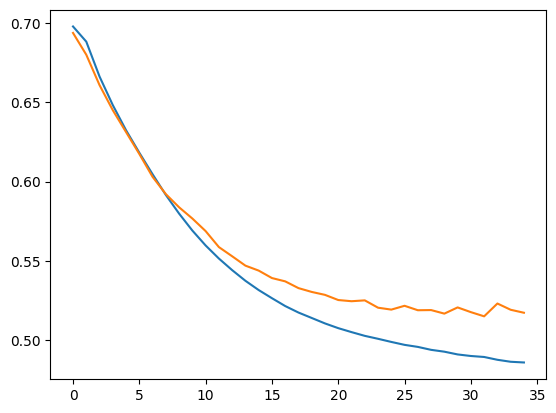

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [49]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [50]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓
┃                   ┃              ┃  Param ┃
┃ Layer (type)      ┃ Output Shape ┃      # ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━┩
│ embedding_3       │ ?            │      0 │
│ (Embedding)       │              │ (unbu… │
├───────────────────┼──────────────┼────────┤
│ simple_rnn_4      │ ?            │      0 │
│ (SimpleRNN)       │              │ (unbu… │
├───────────────────┼──────────────┼────────┤
│ dense_4 (Dense)   │ ?            │      0 │
│                   │              │ (unbu… │
└───────────────────┴──────────────┴────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(
    optimizer=rmsprop, 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'best_rnn_emb.keras',
    save_best_only=True
)
es_cb = keras.callbacks.EarlyStopping(
    patience=3, 
    restore_best_weights=True
)

history = model2.fit(
    train_seq, 
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5109 - loss: 0.6958 - val_accuracy: 0.5116 - val_loss: 0.6945
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5264 - loss: 0.6914 - val_accuracy: 0.5120 - val_loss: 0.6933
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5312 - loss: 0.6888 - val_accuracy: 0.5144 - val_loss: 0.6924
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5445 - loss: 0.6863 - val_accuracy: 0.5212 - val_loss: 0.6919
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5599 - loss: 0.6841 - val_accuracy: 0.5218 - val_loss: 0.6914
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5692 - loss: 0.6817 - val_accuracy: 0.5242 - val_loss: 0.6911
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5803 - loss: 0.6794 - val_accuracy: 0.5248 - val_loss: 0.6911
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5903 - loss: 0.6759 - 